## 1. Import the Libraries

In [1]:
#Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

## 2. Import the data

In [2]:
data = pd.read_csv(r"D:\EDA Project\application_data.csv")

## 3. Cleaning The Data
#### 3.1 Removing the columns with too many null Values

In [3]:
null_columns = data.isnull().sum()/len(data)
#get null columns grater than 25%
null_columns = null_columns[null_columns>0.25]

data.drop(null_columns.index,axis=1,inplace=True)

data.shape

(307511, 72)

#### 3.2 Removing the irrelevant columns

In [4]:
data.columns
irrelevant_columns = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_EMPLOYED','DAYS_REGISTRATION']

data.drop(irrelevant_columns,axis=1,inplace=True)

data.shape

(307511, 48)

#### 3.3 Merge Same Type Flag Columns

In [5]:
data['DOCUMENT_SUMBIT'] =  data['FLAG_DOCUMENT_2']+data['FLAG_DOCUMENT_3']+data['FLAG_DOCUMENT_4']+data['FLAG_DOCUMENT_5']+data['FLAG_DOCUMENT_6']+data['FLAG_DOCUMENT_7']+data['FLAG_DOCUMENT_8']+data['FLAG_DOCUMENT_9']+data['FLAG_DOCUMENT_10']+data['FLAG_DOCUMENT_11']+data['FLAG_DOCUMENT_12']+data['FLAG_DOCUMENT_13']+data['FLAG_DOCUMENT_14']+data['FLAG_DOCUMENT_15']+data['FLAG_DOCUMENT_16']+data['FLAG_DOCUMENT_17']+data['FLAG_DOCUMENT_18']+data['FLAG_DOCUMENT_19']+data['FLAG_DOCUMENT_20']+data['FLAG_DOCUMENT_21']
data['CONTACT_SUMBIT'] = data['FLAG_MOBIL']+data['FLAG_EMP_PHONE']+data['FLAG_WORK_PHONE']+data['FLAG_PHONE']+data['FLAG_EMAIL']
data['CONTACT_SUMBIT']=data['CONTACT_SUMBIT']/5

unwanted_columns = ['FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

data.drop(unwanted_columns,axis=1,inplace=True)
data.shape

(307511, 25)

#### 3.4 Dealing with null data

In [6]:
null_columns = data.isnull().sum()
print(null_columns[null_columns>0])

data['AMT_ANNUITY'].fillna(data['AMT_ANNUITY'].mean(),inplace=True)
data['AMT_GOODS_PRICE'].fillna(data['AMT_GOODS_PRICE'].mean(),inplace=True)
data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].median(),inplace=True)
data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].max(),inplace=True)

data.drop(data['NAME_TYPE_SUITE'][data['NAME_TYPE_SUITE'].isnull()].index,axis=0, inplace=True)
data.shape

AMT_ANNUITY                 12
AMT_GOODS_PRICE            278
NAME_TYPE_SUITE           1292
CNT_FAM_MEMBERS              2
DAYS_LAST_PHONE_CHANGE       1
dtype: int64


(306219, 25)

#### 3.5 Changing the dtypes

In [7]:
print(data.select_dtypes(include='number').nunique().sort_values())

data["TARGET"] = data["TARGET"].astype("object")
data["FLAG_CONT_MOBILE"] = data["FLAG_CONT_MOBILE"].astype("object")
data["CONTACT_SUMBIT"] = data["CONTACT_SUMBIT"].astype("object")
data["DOCUMENT_SUMBIT"] = data["DOCUMENT_SUMBIT"].astype("object")

TARGET                             2
FLAG_CONT_MOBILE                   2
DOCUMENT_SUMBIT                    5
CONTACT_SUMBIT                     5
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
REGION_POPULATION_RELATIVE        81
AMT_GOODS_PRICE                  985
AMT_INCOME_TOTAL                2518
DAYS_LAST_PHONE_CHANGE          3773
AMT_CREDIT                      5585
DAYS_ID_PUBLISH                 6168
AMT_ANNUITY                    13656
DAYS_BIRTH                     17458
SK_ID_CURR                    306219
dtype: int64


#### 3.6 Changing the some columns Number to Object

In [8]:
data['CNT_CHILDREN'] = data['CNT_CHILDREN'].apply(lambda x: str(x) if x<4 else "4+")
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].apply(lambda x: str(int(x)) if x<6 else "6+")

#### 3.7 Converting Days column to Years

In [9]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(lambda x : round(abs(x)/365,1))
data['DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH'].apply(lambda x : round(abs(x)/365,1))
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].apply(lambda x : round(abs(x)/365,1))
data.rename(columns={'DAYS_BIRTH': 'YEARS_BIRTH', 'DAYS_ID_PUBLISH': 'YEARS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE': 'YEARS_LAST_PHONE_CHANGE'}, inplace=True)

#### 3.8 Dealing with outliers

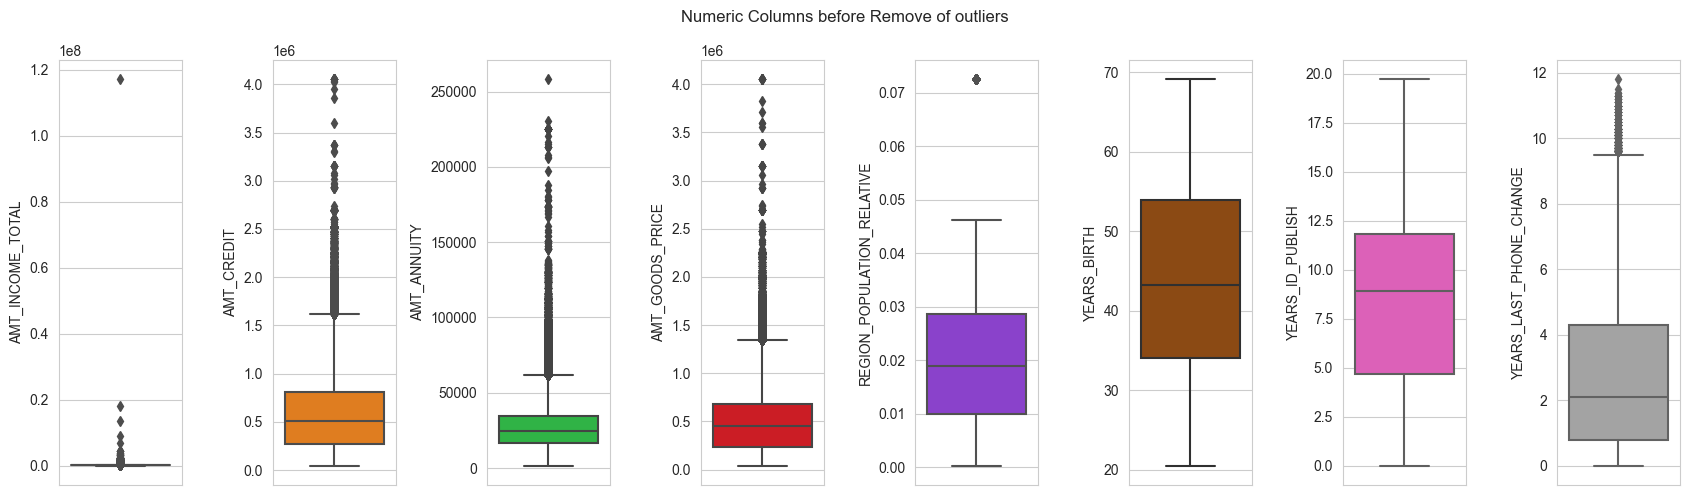

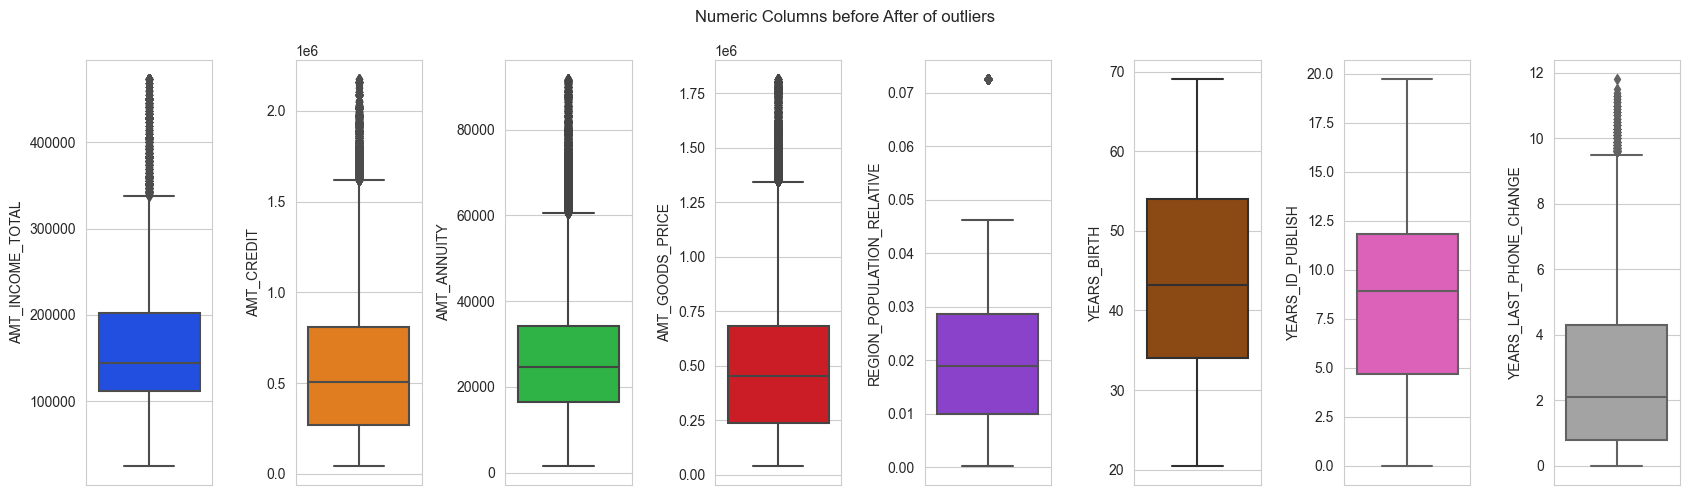

In [10]:
columns = list(data.select_dtypes(include='number').columns)
columns.remove("SK_ID_CURR")

f, axes = plt.subplots(1,len(columns),figsize=(17, 5))
f.suptitle("Numeric Columns before Remove of outliers")
index = 0
for name, ax in zip(columns, axes.flatten()):
    sns.boxplot(y=name, data=data, orient='v', ax=ax ,palette=[sns.color_palette("bright")[index]])
    index+=1

plt.tight_layout()

data.drop(data[data['AMT_INCOME_TOTAL']>data['AMT_INCOME_TOTAL'].quantile(0.99)].index,axis=0,inplace=True)
data.drop(data[data['AMT_CREDIT']>data['AMT_CREDIT'].quantile(0.998)].index,axis=0,inplace=True)
data.drop(data[data['AMT_ANNUITY']>data['AMT_ANNUITY'].quantile(0.998)].index,axis=0,inplace=True)
data.drop(data[data['AMT_GOODS_PRICE']>data['AMT_GOODS_PRICE'].quantile(0.998)].index,axis=0,inplace=True)

f, axes = plt.subplots(1,len(columns),figsize=(17, 5),)
f.suptitle("Numeric Columns before After of outliers")
index = 0
for name, ax in zip(columns, axes.flatten()):
    sns.boxplot(y=name, data=data, orient='v', ax=ax, palette=[sns.color_palette("bright")[index]])
    index+=1

plt.tight_layout()

#### 3.9 Renaming Categorical Value

In [11]:
data['TARGET']=data['TARGET'].apply(lambda x: "Risky" if int(x)==1 else "Safe")
data.shape

(301540, 25)

## 4. Data Analysis
#### 4.1 Univariate UnOrder Variables

In [12]:
def UnivariateUnOrdered(data,columnName,hue='TARGET'):
    tmp_data = (data[[columnName,hue]].value_counts(normalize=True)*100).reset_index()

    plt.title(f"{columnName} Distubution Plot")
    sns.barplot(data=tmp_data,y=columnName,x=0,errorbar=None,estimator=sum).set(xlabel='Percentage')
    plt.show()

    plt.title(f"{columnName} Distubution Plot With Target")
    sns.barplot(data=tmp_data,y=columnName,x=0,hue=hue).set(xlabel='Percentage')
    plt.show()   

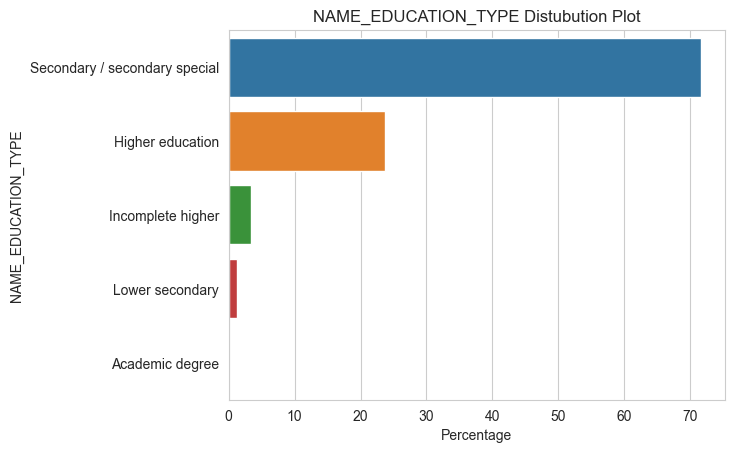

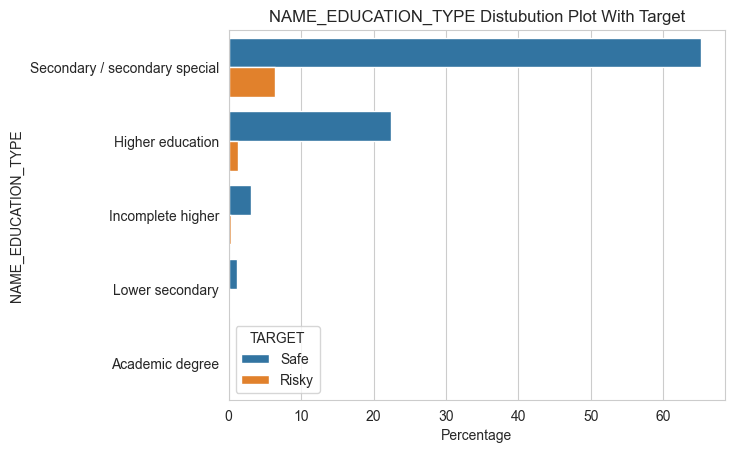

In [13]:
UnivariateUnOrdered(data,"NAME_EDUCATION_TYPE")

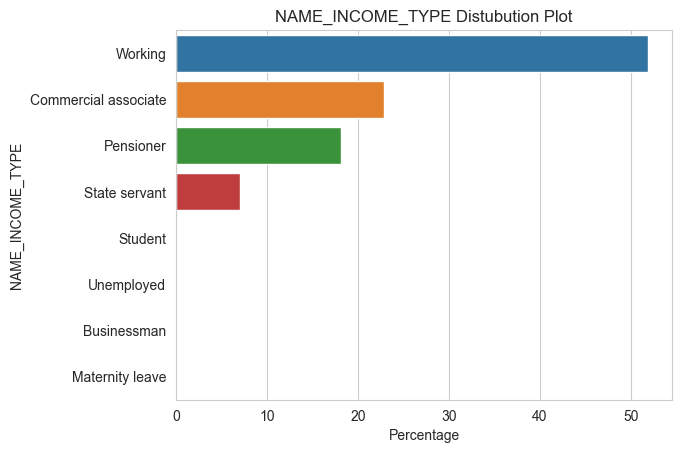

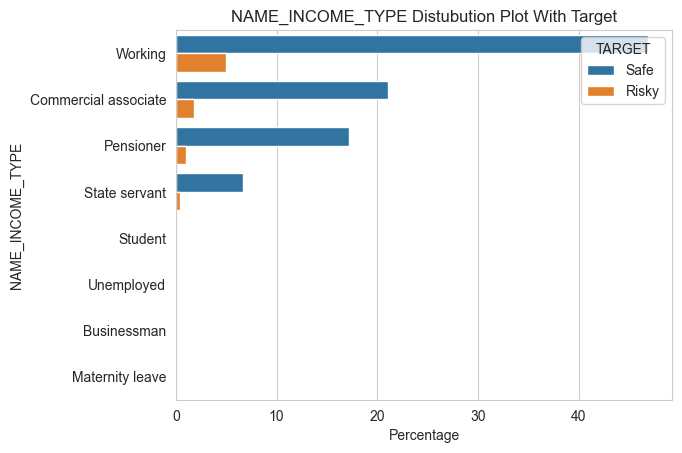

In [14]:
UnivariateUnOrdered(data,"NAME_INCOME_TYPE")

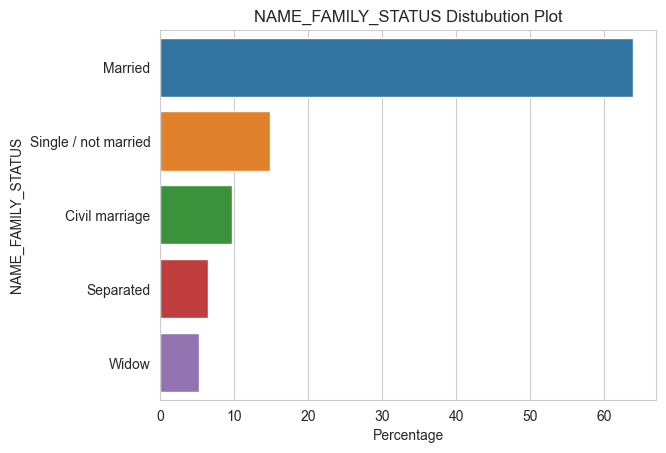

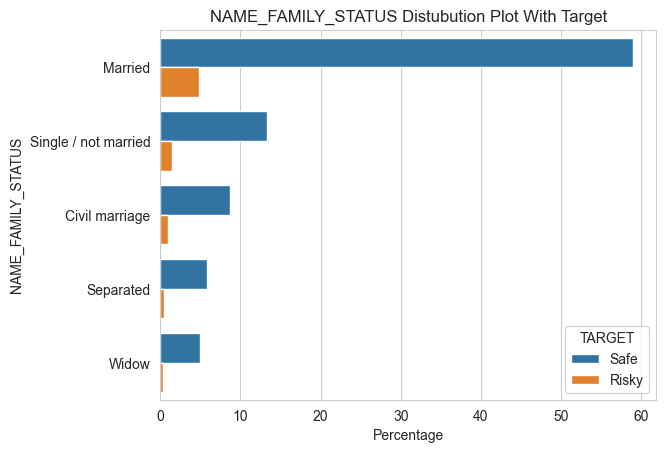

In [15]:
UnivariateUnOrdered(data,"NAME_FAMILY_STATUS")

#### 4.2 Univariate Order Variables

In [16]:
def UnivariateOrdered(data,columnName):

    plt.title(f"{columnName} Distubution Plot")
    sns.histplot(data=data, x=columnName, kde=True,hue='TARGET')
    plt.show()

    plt.title(f"{columnName} Box Plot")
    sns.boxplot(data=data, x=columnName, y='TARGET')
    plt.show()

    plt.title(f"{columnName} violinplot Plot")
    sns.violinplot(data=data, y=columnName, x='TARGET')
    plt.show()

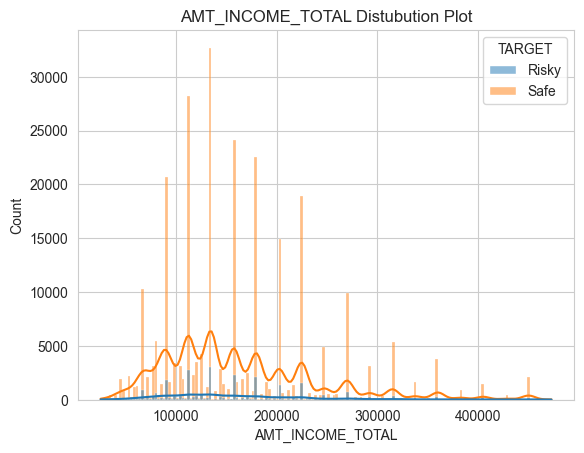

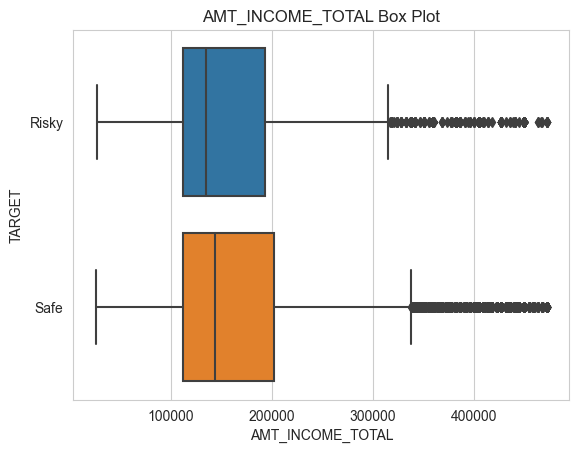

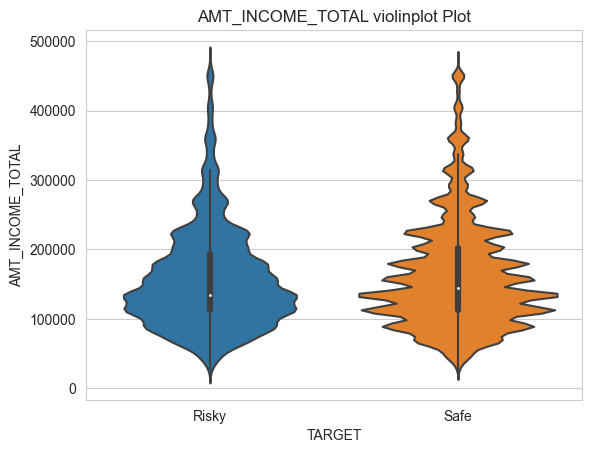

In [17]:
UnivariateOrdered(data,"AMT_INCOME_TOTAL")

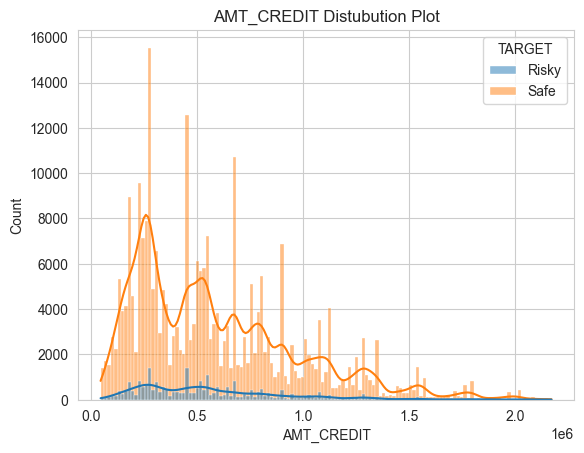

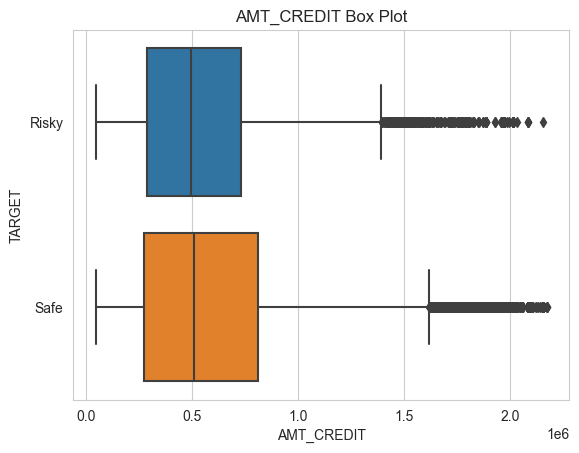

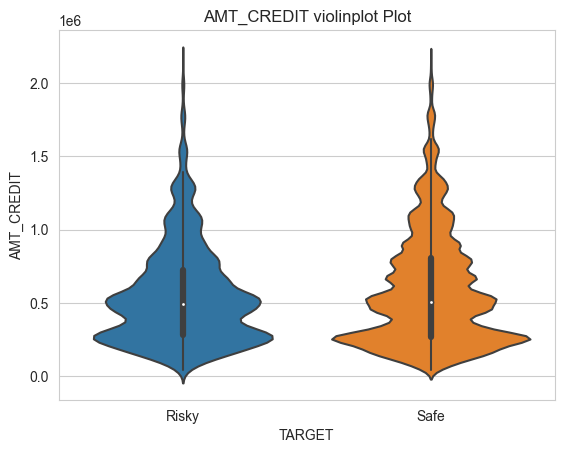

In [18]:
UnivariateOrdered(data,"AMT_CREDIT")

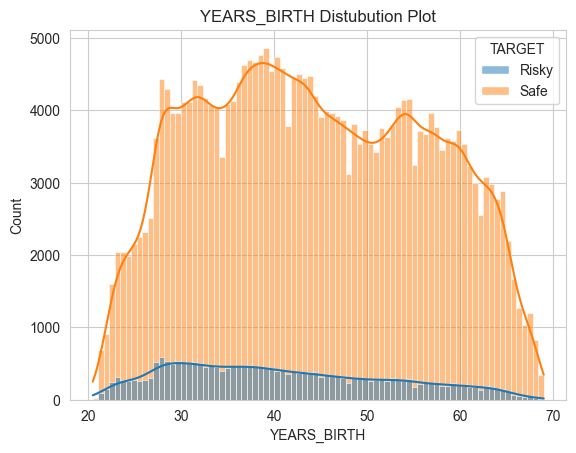

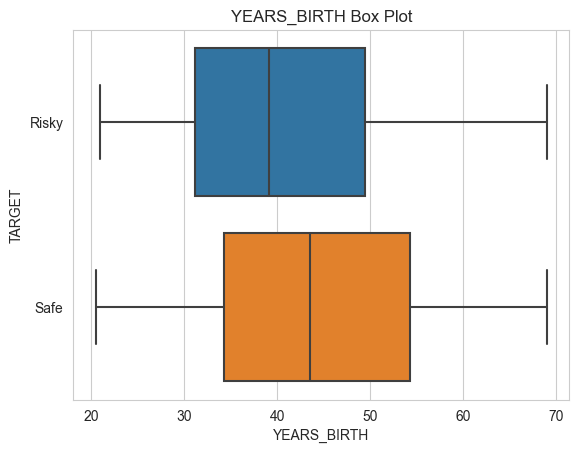

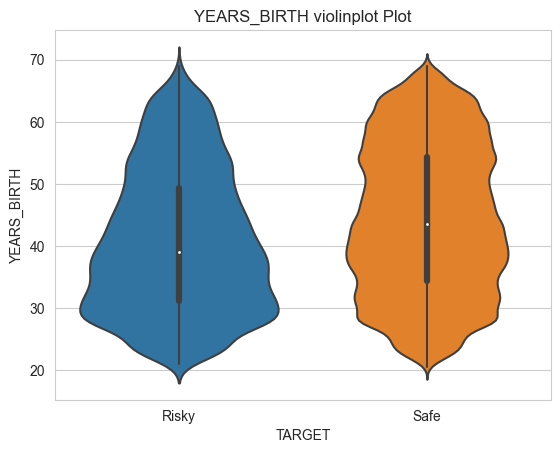

In [19]:
UnivariateOrdered(data,"YEARS_BIRTH")

#### 4.3 Bivariate Order&UnOrder Variables

In [20]:
def BivariateOrderUnOrder(data,columnsNmae1,columnsNmae2):
    plt.title(f"{columnsNmae1} and {columnsNmae2} box Plot")
    sns.boxplot(data=data, x=columnsNmae1, y=columnsNmae2,hue='TARGET')
    plt.legend(loc='best')
    plt.show()

    plt.title(f"{columnsNmae1} and {columnsNmae2} violinplot Plot")
    sns.violinplot(data=data, x=columnsNmae1, y=columnsNmae2)
    plt.show()

    tmp_sample = data.sample(n=10000)
    plt.title(f"{columnsNmae1} and {columnsNmae2} lineplot Plot")
    sns.lineplot(data=tmp_sample, y=columnsNmae1, x='TARGET', hue=columnsNmae2)
    plt.show()

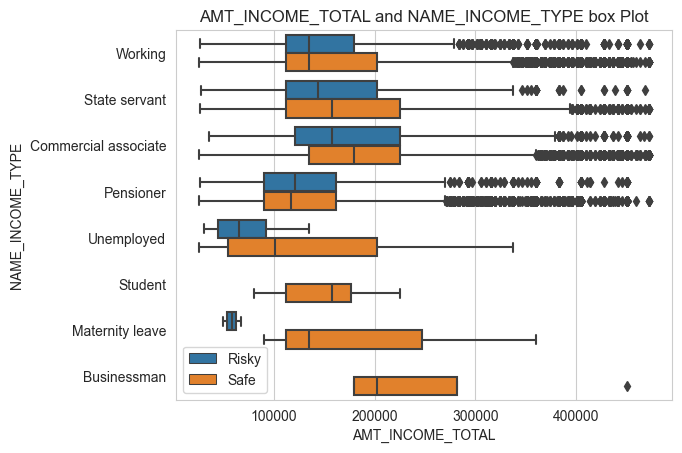

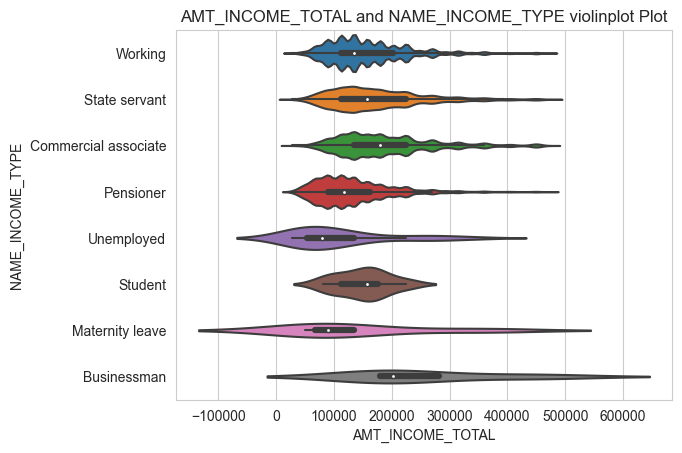

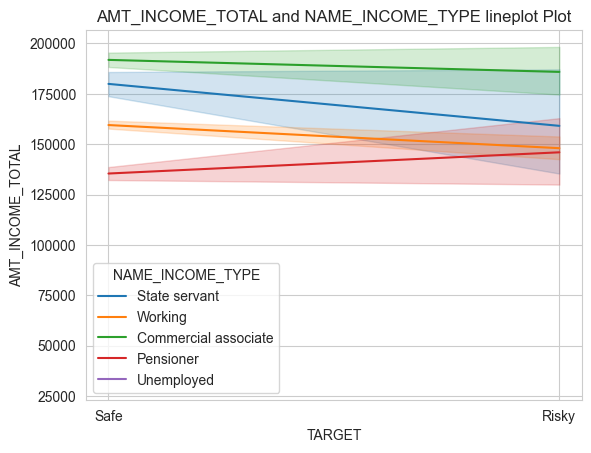

In [21]:
BivariateOrderUnOrder(data,'AMT_INCOME_TOTAL','NAME_INCOME_TYPE')

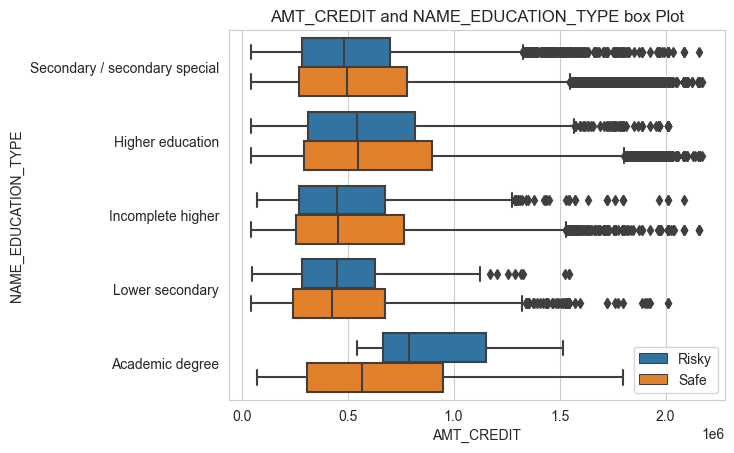

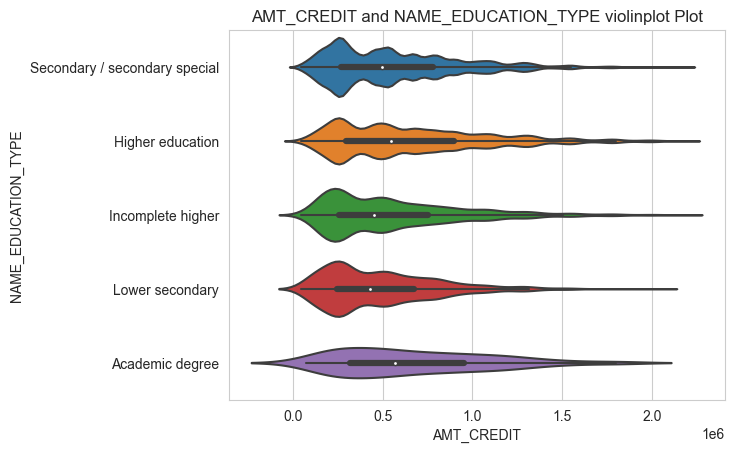

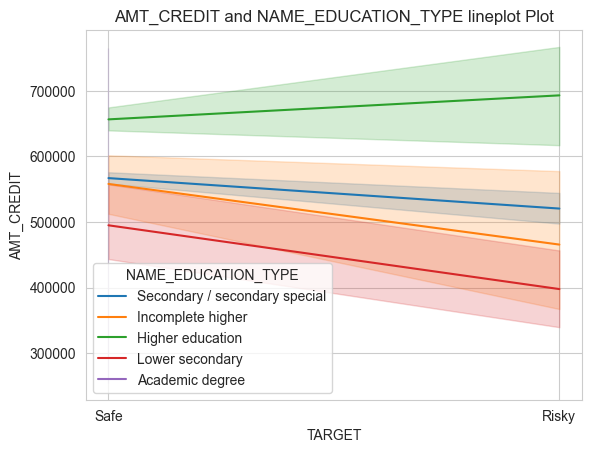

In [22]:
BivariateOrderUnOrder(data,'AMT_CREDIT','NAME_EDUCATION_TYPE')

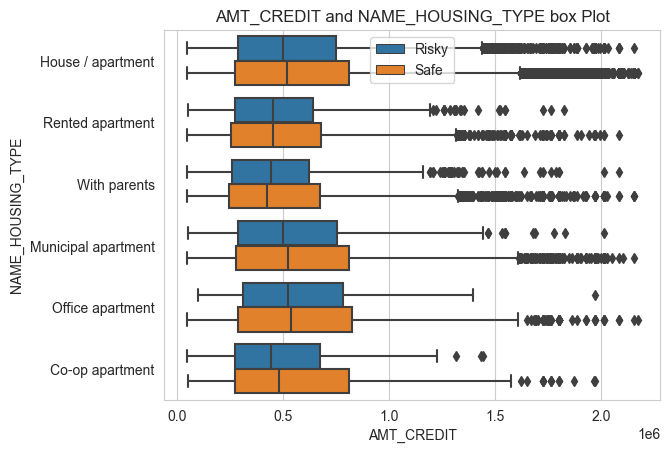

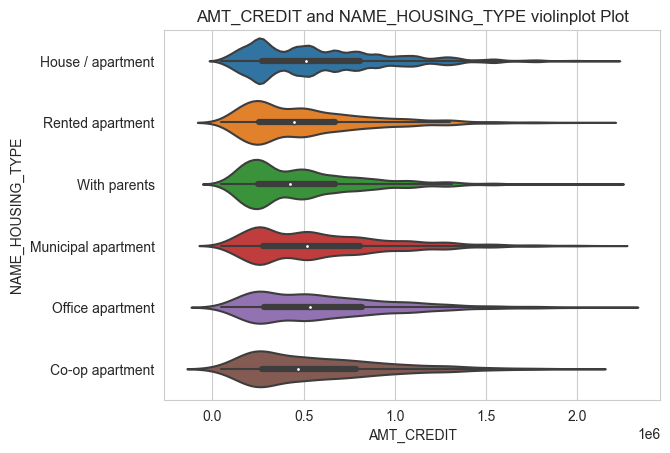

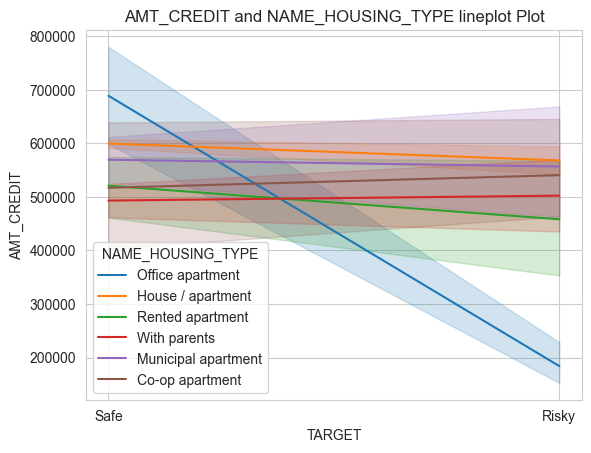

In [23]:
BivariateOrderUnOrder(data,'AMT_CREDIT','NAME_HOUSING_TYPE')

#### 4.4 Bivariate 2 UnOrder Variables

In [24]:
def Bivariate2UnOrder(data,columnsNmae1,columnsNmae2):

    tmp = data.pivot_table(index=columnsNmae1,columns=columnsNmae2,values='TARGET',aggfunc=lambda x: len(x),fill_value=0)
    plt.title(f"Heatmap Count of the total Cases")
    sns.heatmap(data=tmp,annot=True,center=tmp.max().max()/2,fmt='.0f')
    plt.show()

    tmp = data.pivot_table(index=columnsNmae1,columns=columnsNmae2,values='TARGET',aggfunc=lambda x: len(x[x=='Risky']),fill_value=0)
    plt.title(f"Heatmap Count of the Risky Cases")
    sns.heatmap(data=tmp,annot=True,center=tmp.max().max()/2,fmt='.0f',cmap=sns.color_palette("flare", as_cmap=True))
    plt.show()

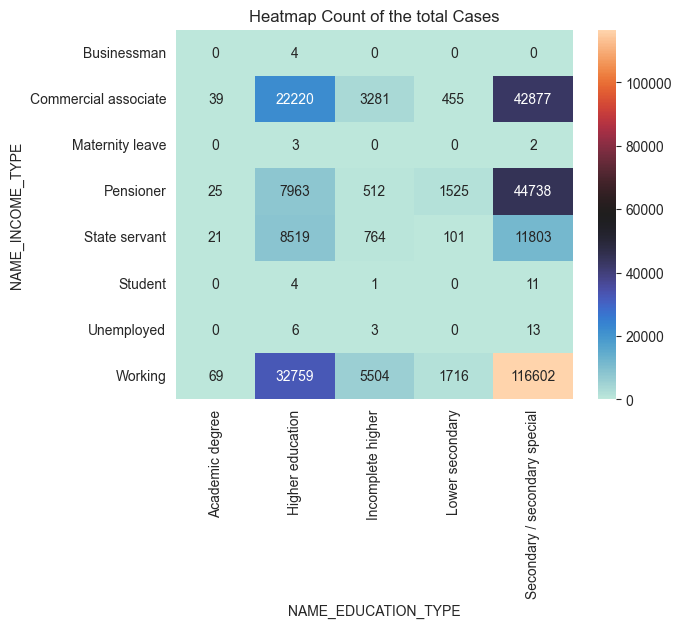

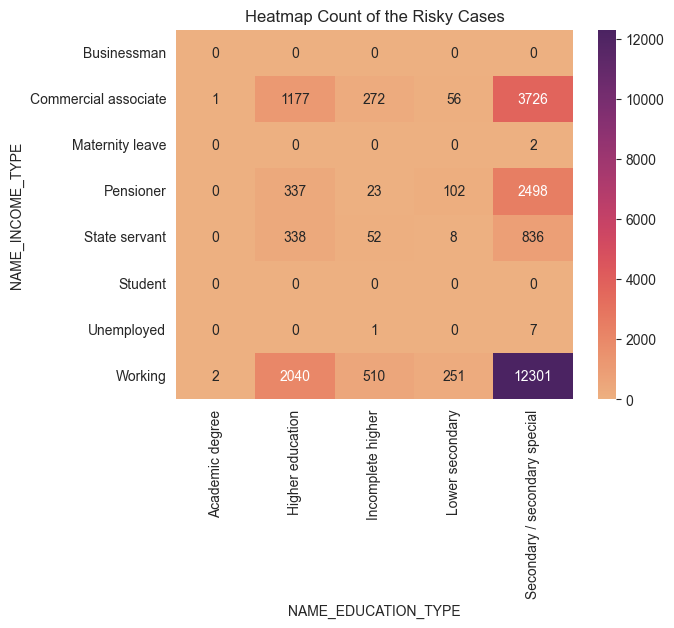

In [25]:
Bivariate2UnOrder(data,'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE')   

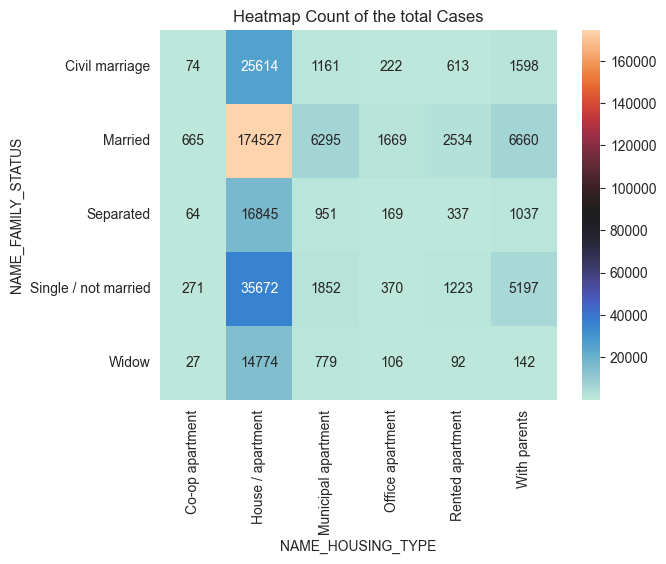

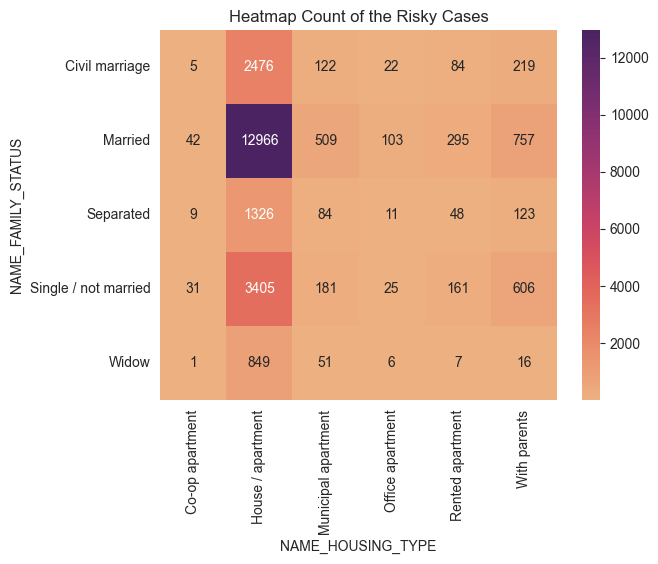

In [26]:
Bivariate2UnOrder(data,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE')   

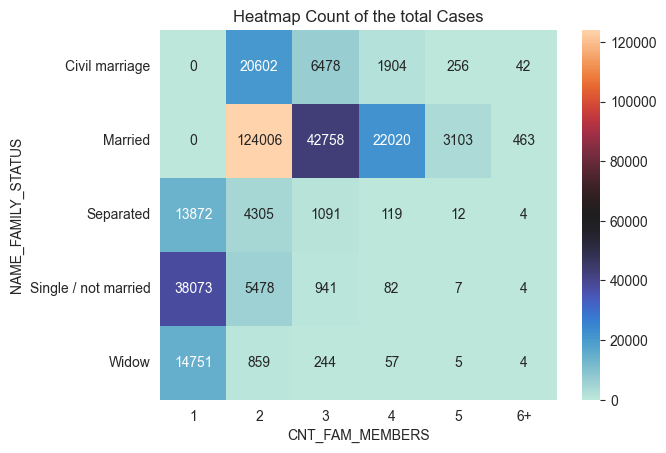

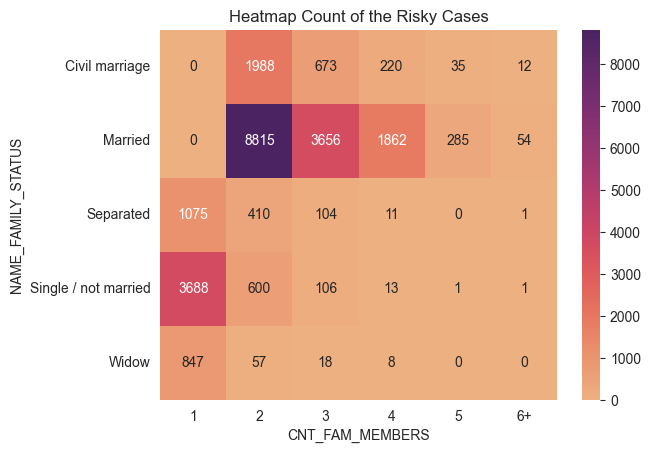

In [27]:
Bivariate2UnOrder(data,'NAME_FAMILY_STATUS','CNT_FAM_MEMBERS')   

#### 4.5 Bivariate 2 Order Variables

In [28]:
def Bivariate2Order(data,columnsNmae1,columnsNmae2):

    tmp_sample = data.sample(n=3000)
    plt.title(f"{columnsNmae1} and {columnsNmae2} ScatterPlot")
    sns.scatterplot(data=tmp_sample,x=columnsNmae1,y=columnsNmae2,hue='TARGET',style="TARGET")
    plt.show()

    sns.displot(tmp_sample, x=columnsNmae1, y=columnsNmae2, hue="TARGET",kind="kde")
    plt.show()

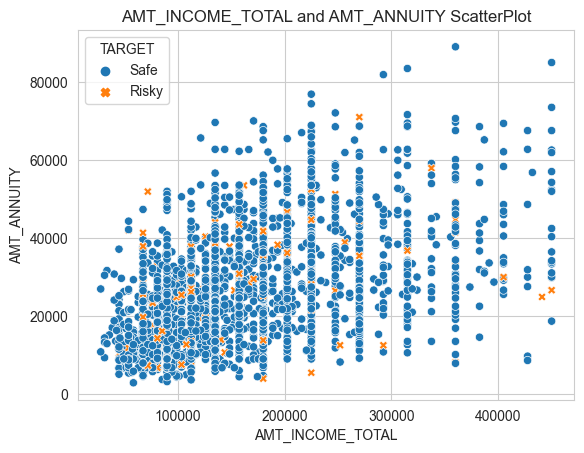

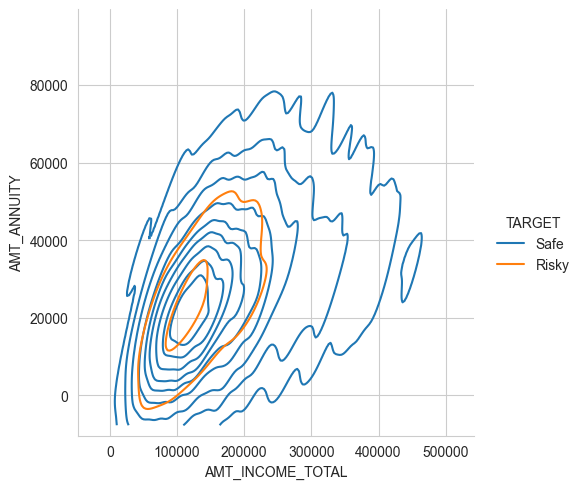

In [29]:
Bivariate2Order(data,'AMT_INCOME_TOTAL','AMT_ANNUITY')

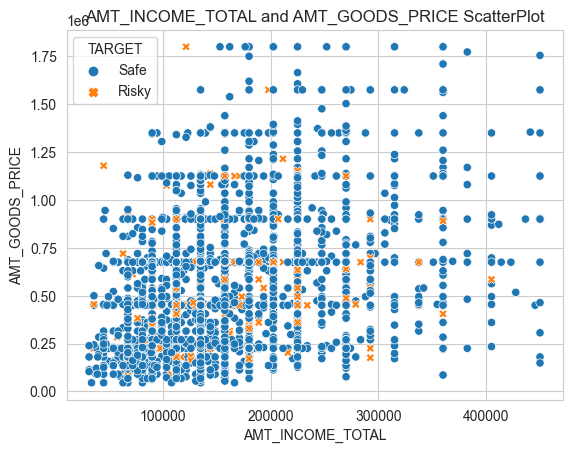

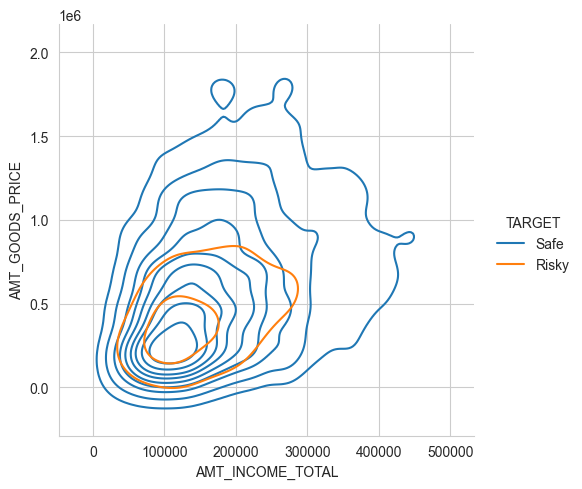

In [30]:
Bivariate2Order(data,'AMT_INCOME_TOTAL','AMT_GOODS_PRICE')

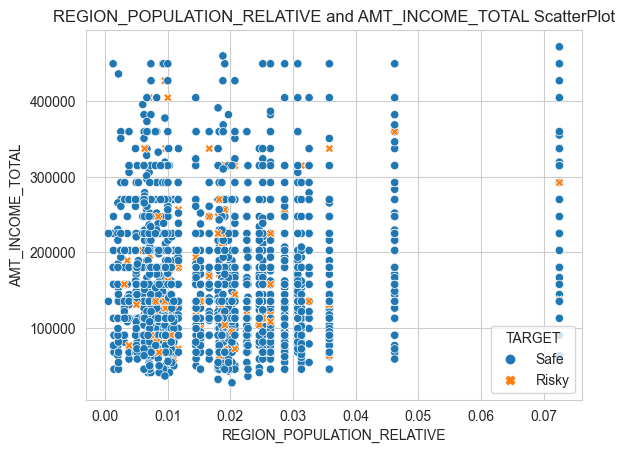

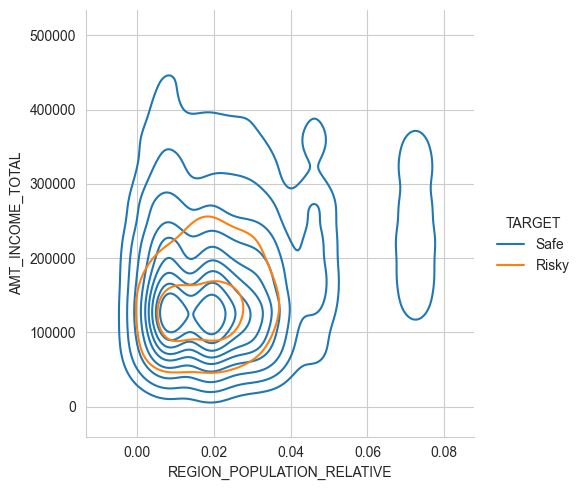

In [31]:
Bivariate2Order(data,'REGION_POPULATION_RELATIVE','AMT_INCOME_TOTAL')

##### 4.6 Checking Correlation

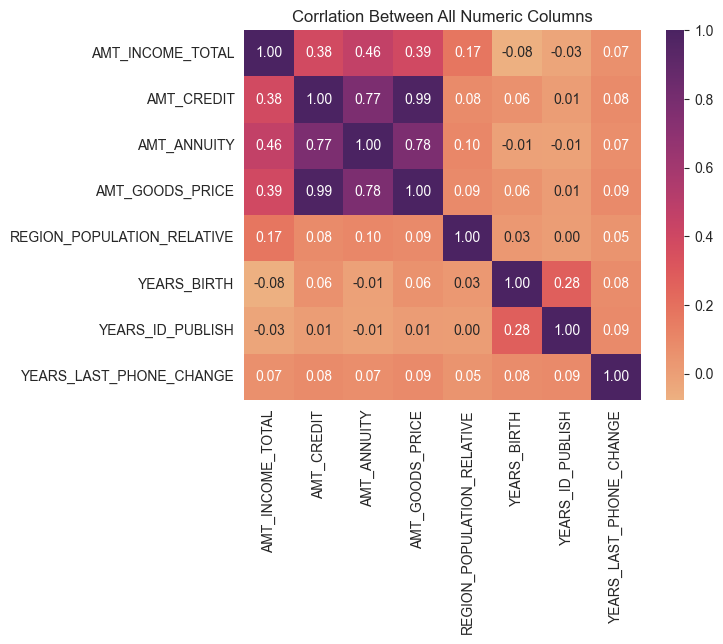

In [32]:
columns = list(data.select_dtypes(include='number').columns)[1:]
tmp = data[columns].corr()
plt.title("Corrlation Between All Numeric Columns")
sns.heatmap(data=tmp,annot=True,fmt='.2f',cmap=sns.color_palette("flare", as_cmap=True))
plt.show()
